In [2]:
%matplotlib qt
import pandas as pd
import json
import numpy as np
import os
import re
import time
from matplotlib import pyplot as plt
import ast
from PIL import Image
import datetime

In [7]:

sorted(os.listdir('/Users/HP/Desktop/UNI/LM_1/ACN/data_again/data'))[0]

'1710779461'

In [ ]:
os.

In [4]:
302041/(60*24)

209.75069444444443

+ controllare raggio interazione (dovrebbe essere 10 metri)
+ controllare raggio voice chat (dovrebbe essere 30 metri)
+ controllare zone più trafficate


### Importare il dataset delle posizioni
La cella seguente serve a importare il dataset delle posizioni dei giocatori all'interno di Decentraland. Viene registrato anche il server dal quale la posizione è presa. Vengono create una colonna con il datetime convertito dal timestamp, una con la data della registrazione e una con l'orario di questa (arrotondato al minuto).

In [8]:
import pandas as pd
import os
import datetime
import ast
import pytz

def resolve_conflicts_on_duplicates(df):
    # Identify rows where there are conflicts (more than one server at the same time for a user)
    conflicts = df.groupby(['id', 'date', 'rounded_time']).filter(lambda x: x['server'].nunique() > 1)
    
    # Get the most frequent server for each user (id) overall
    most_frequent_server = df.groupby('id')['server'].agg(lambda x: x.value_counts().idxmax())

    # Apply resolution only to conflicts by filtering to keep rows with the most frequent server for the user
    conflicts_resolved = conflicts[conflicts.apply(lambda row: row['server'] == most_frequent_server[row['id']], axis=1)]
    
    # Combine non-conflicting rows with resolved conflicts
    non_conflicts = df.drop(conflicts.index)
    resolved_df = pd.concat([non_conflicts, conflicts_resolved]).sort_index()
    
    return resolved_df

def create_df_by_date(directory, start_from=None, timezone='UTC'):
    # Set the initial date based on start_from if provided
    current_date = start_from if start_from else None
    df = pd.DataFrame()  # Initialize an empty DataFrame

    for filename in sorted(os.listdir(directory)):  # Sort files to process sequentially
        file_path = os.path.join(directory, filename)
        file_date = datetime.datetime.fromtimestamp(int(filename)).astimezone(pytz.timezone(timezone)).date()

        # Skip files before the start date
        if current_date and file_date < current_date:
            continue

        # Save and reset the DataFrame if the date changes
        if current_date and file_date != current_date:
            save_df_for_date(df, directory, current_date, timezone)
            df = pd.DataFrame()  # Reset DataFrame for the new day

        # Update current_date for the first time or when the date changes
        current_date = file_date

        # Read and process file
        df = process_file(file_path, df)
    
    # Save the last day's data
    if not df.empty:
        save_df_for_date(df, directory, current_date, timezone)

def process_file(file_path, df):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith("https"):
            server = line.strip()
        elif line.startswith("{'ok': True"):
            dict_obj = ast.literal_eval(line[:-1])
            tmp_df = pd.DataFrame(dict_obj['peers'])
            tmp_df['server'] = server
            df = pd.concat([df, tmp_df], ignore_index=True)
    return df

def save_df_for_date(df, directory, date, timezone):
    # Convert timestamps to datetime with the given timezone
    df['datetime'] = pd.to_datetime(df['lastPing'], unit='ms').dt.tz_localize('UTC').dt.tz_convert(timezone)
    df['date'] = df['datetime'].dt.date
    df['rounded_time'] = df['datetime'].dt.round('min').dt.strftime('%H:%M')
    df = resolve_conflicts_on_duplicates(df)

    # Save the DataFrame for the specified date
    output_path = os.path.join(directory, 'dfs', f'{str(date)}.csv')
    df.to_csv(output_path, index=False)
    print(f'Saved data for date: {date}')

# Example usage:
# create_df_by_date('/path/to/data/directory', start_from=datetime.date(2024, 3, 18), timezone='Europe/Berlin')


In [9]:
create_df_by_date('/Users/HP/Desktop/UNI/LM_1/ACN/data_again/data', start_from=datetime.date(2024, 4, 18))

Saved data for date: 2024-04-18


KeyboardInterrupt: 

In [2]:
# Specify the directory you want to iterate over
directory = '/Users/HP/Desktop/UNI/LM_1/ACN/dataset/data'
df = pd.DataFrame()
# Iterate over the files in the specified directory
for filename in os.listdir(directory):
    # Create the full path to the file
    file_path = os.path.join(directory, filename)
    print(f'Opening {filename}:')

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for elem in lines:
        if elem.startswith("https"): server = elem
        if elem.startswith("{'ok': True"):
            dict_obj = ast.literal_eval(elem[:-1])
            tmp_df = pd.DataFrame(dict_obj['peers'])
            tmp_df['server'] = server
            df = pd.concat([df, tmp_df], ignore_index=True)
    
df['datetime'] = pd.to_datetime(df['lastPing'], unit='ms')

# Create the 'date' column with only the date part
df['date'] = df['datetime'].dt.date

# Create the 'rounded_time' column with time rounded to the nearest minute
df['rounded_time'] = df['datetime'].dt.round('min').dt.strftime('%H:%M')

Opening 1710779581:
Opening 1710779641:
Opening 1710779701:
Opening 1710779881:
Opening 1710780001:
Opening 1710780061:
Opening 1710780181:
Opening 1710780242:
Opening 1710780421:
Opening 1710780601:
Opening 1710780781:
Opening 1710780841:
Opening 1710780961:
Opening 1710781022:
Opening 1710781081:
Opening 1710781141:
Opening 1710781201:
Opening 1710781381:
Opening 1710781441:
Opening 1710781501:
Opening 1710781621:
Opening 1710781681:
Opening 1710781741:
Opening 1710781801:
Opening 1710781861:
Opening 1710781921:
Opening 1710782101:
Opening 1710782161:
Opening 1710782221:
Opening 1710782341:
Opening 1710782402:
Opening 1710782461:
Opening 1710782521:
Opening 1710782581:
Opening 1710782641:
Opening 1710782701:
Opening 1710782761:
Opening 1710782821:
Opening 1710782881:
Opening 1710783001:
Opening 1710783061:
Opening 1710783121:
Opening 1710783181:
Opening 1710783241:
Opening 1710783301:
Opening 1710783361:
Opening 1710783601:
Opening 1710783661:
Opening 1710783721:
Opening 1710783781:


KeyboardInterrupt: 

La seguente funzione dovrebbe rimuovere tutti i conflitti dovuti alla registrazione della posizione da parte di server diversi allo stesso tempo. Viene scelto il server che ha registrato più posizioni per il determinato user.

In [3]:
def resolve_conflicts_on_duplicates(df):
    # Identify rows where there are conflicts (more than one server at the same time for a user)
    conflicts = df.groupby(['id', 'date', 'rounded_time']).filter(lambda x: x['server'].nunique() > 1)
    
    # Get the most frequent server for each user (id) overall
    most_frequent_server = df.groupby('id')['server'].agg(lambda x: x.value_counts().idxmax())

    # Apply resolution only to conflicts by filtering to keep rows with the most frequent server for the user
    conflicts_resolved = conflicts[conflicts.apply(lambda row: row['server'] == most_frequent_server[row['id']], axis=1)]
    
    # Combine non-conflicting rows with resolved conflicts
    non_conflicts = df.drop(conflicts.index)
    resolved_df = pd.concat([non_conflicts, conflicts_resolved]).sort_index()
    
    return resolved_df

# Example usage
resolved_df = resolve_conflicts_on_duplicates(df)

# unique_ids = resolved_df['id'].unique()
# for id in unique_ids:
#     print(f"id = {id}, {resolved_df[resolved_df['id'] == id]['rounded_time'].value_counts()}")


In [4]:
resolved_df

,id,address,lastPing,parcel,position,server,datetime,date,rounded_time
0,0x08d96844be2b7b05c45d0d81fb6dce03fddb0b66,0x08d96844be2b7b05c45d0d81fb6dce03fddb0b66,1.710779e+12,"[-27, 56]","[-416.0089111328125, 1.679999828338623, 906.51...",https://peer-eu1.decentraland.org/comms/peers\n,2024-03-18 16:31:02.540000000,2024-03-18,16:31
2,0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8,0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8,1.710779e+12,"[-101, 127]","[-1608.270751953125, 1.679999828338623, 2045.2...",https://peer.decentral.io/comms/peers\n,2024-03-18 16:31:01.839000064,2024-03-18,16:31
3,0x60a43df8f1c7a4156081717f1396cb587efb95c4,0x60a43df8f1c7a4156081717f1396cb587efb95c4,1.710779e+12,"[-28, 57]","[-442.08245849609375, 1.679999828338623, 925.0...",https://peer.decentral.io/comms/peers\n,2024-03-18 16:31:02.575000064,2024-03-18,16:31
4,0x5642e6fd2a6d393e774d11fd528862f1b5f8c8d3,0x5642e6fd2a6d393e774d11fd528862f1b5f8c8d3,1.710779e+12,"[147, 60]","[2361.61572265625, 2.151712417602539, 961.4864...",https://peer.decentral.io/comms/peers\n,2024-03-18 16:31:01.027000064,2024-03-18,16:31
5,0x0a3dff6b6786e25d08168fdba2c41b550014219d,0x0a3dff6b6786e25d08168fdba2c41b550014219d,1.710779e+12,"[146, 64]","[2337.94775390625, 29.640836715698242, 1034.95...",https://peer.decentral.io/comms/peers\n,2024-03-18 16:31:02.190000128,2024-03-18,16:31
...,...,...,...,...,...,...,...,...,...
1587,0xd89d37b9b1058f5b5d49ebfd067b269087aee7e0,0xd89d37b9b1058f5b5d49ebfd067b269087aee7e0,1.710780e+12,"[1, -1]","[17.63665008544922, 105.9000015258789, -3.0052...",https://archipelago-stats.decentraland.org/com...,2024-03-18 16:39:02.838000128,2024-03-18,16:39
1588,0xc76c7c574b5ffdac2abe605802c7cc70cd056e96,0xc76c7c574b5ffdac2abe605802c7cc70cd056e96,1.710780e+12,"[-100, 127]","[-1588, 1.6799999475479126, 2040]",https://archipelago-stats.decentraland.org/com...,2024-03-18 16:39:01.483000064,2024-03-18,16:39
1589,0x64a50fbb1f6290d792110a8dbb16ba33f40f5e28,0x64a50fbb1f6290d792110a8dbb16ba33f40f5e28,1.710780e+12,"[-100, 127]","[-1588, 1.6799999475479126, 2040]",https://archipelago-stats.decentraland.org/com...,2024-03-18 16:39:02.892000000,2024-03-18,16:39
1590,0x75903b98fd7a262882392b97bebcd09380d0340e,0x75903b98fd7a262882392b97bebcd09380d0340e,1.710780e+12,"[138, -2]","[2208.3798828125, 1.679999828338623, -17.77606...",https://archipelago-stats.decentraland.org/com...,2024-03-18 16:39:04.163000064,2024-03-18,16:39


In [5]:
len(resolved_df['id'].unique())

187

### Importare transazioni 
La seguente funzione prende dati su transazioni degli addresses forniti dall'API di Etherscan.


In [72]:
import requests
import time
from typing import List, Dict

def fetch_etherscan_transactions(addresses: List[str], api_key: str) -> List[Dict]:
    """
    Fetch all transactions for a list of Ethereum addresses using Etherscan API.
    
    Args:
        addresses (List[str]): List of Ethereum addresses
        api_key (str): Etherscan API key
    
    Returns:
        List[Dict]: List of transactions with their details
    """
    base_url = "https://api.etherscan.io/api"
    rate_limit_delay = 0.25  # Rate limit: max 5 calls per second
    all_transactions = []
    
    for address in addresses:
        # Fetch normal transactions
        params = {
            'module': 'account',
            'action': 'txlist',
            'address': address,
            'startblock': 0,
            'endblock': 99999999,
            'sort': 'asc',
            'apikey': api_key
        }
        
        try:
            # Get normal transactions
            response = requests.get(base_url, params=params)
            response.raise_for_status()
            normal_txs = response.json().get('result', [])
            
            # Add transaction type and source address
            for tx in normal_txs:
                tx['tx_type'] = 'normal'
                tx['fetched_for_address'] = address
            
            all_transactions.extend(normal_txs)
            time.sleep(rate_limit_delay)
            
            # Get internal transactions
            params['action'] = 'txlistinternal'
            response = requests.get(base_url, params=params)
            response.raise_for_status()
            internal_txs = response.json().get('result', [])
            
            # Add transaction type and source address
            for tx in internal_txs:
                tx['tx_type'] = 'internal'
                tx['fetched_for_address'] = address
                
            all_transactions.extend(internal_txs)
            time.sleep(rate_limit_delay)
            
            print(f"Successfully fetched transactions for {address}")
            
        except requests.exceptions.RequestException as e:
            print(f"Error fetching transactions for address {address}: {str(e)}")
            continue
    
    return all_transactions

In [73]:
transactions = fetch_etherscan_transactions(df['address'].unique().tolist(), 'QXAHJMXYKB3X4GDCG7B75BTA396I34FTSK')

Successfully fetched transactions for 0x08d96844be2b7b05c45d0d81fb6dce03fddb0b66


KeyboardInterrupt: 

Le transazioni del dataset fornito sono già state registrate in un csv

In [ ]:
transaction_df = pd.read_csv('/Users/HP/Desktop/UNI/LM_1/ACN/transaction_df.csv')

La seguente funzione rimuove tutte le transazioni che non sono tra addresses conosciuti e tutte le transazioni tra lo stesso address.

In [ ]:
def filter_transactions(df, addresses):

    df = df[df['from'].isin(addresses) & df['to'].isin(addresses)]
    return df[df['from'] != df['to']]


unique_addresses = df['address'].unique()
transaction_df = filter_transactions(transaction_df, unique_addresses)

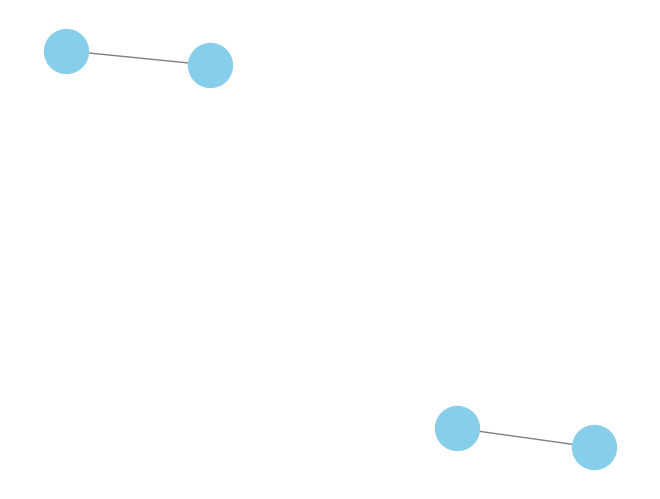

In [ ]:
import networkx as nx

# Sample data
ids = unique_addresses  # List of nodes
#ids = list(set(transaction_df['from'].unique()).union(set(transaction_df['to'].unique())))
edges = transaction_df[['from','to']].to_numpy() # List of edges between nodes

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(ids)

# Add edges
G.add_edges_from(edges)

# Draw the graph
import matplotlib.pyplot as plt

nx.draw(G, with_labels=False, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()


### Similarity index

Prendere id unici, fare nested for e calcolare la similarità tra i due utenti. La prossimità viene calcolata ogni 5/10 minuti (?). 

La seguente funzione crea un edge tra due utenti se allo stesso minuto si trovano a una distanza minore del raggio fornito.

In [6]:
def get_distance(position1, position2):
    return np.sqrt((position1[0]-position2[0])**2 + (position1[2]-position2[2])**2)

def get_edges(df, date, radius):
    df = df[df['date'] == date]
    rounded_times = df['rounded_time'].unique()
    edges_dict = {}
    for time in rounded_times:
        print(f'Time = {time}')
        df_tmp = df[df['rounded_time'] == time]
        unique_ids = df_tmp['id'].unique()
        print(f'Active players: {len(unique_ids)}')
        #print(unique_ids)
        edges_tmp = []
        if len(unique_ids) < 2: pass
        for i in range(len(unique_ids)):
            for j in range(i+1,len(unique_ids)):
                #print(f'id1 = {unique_ids[i]}, id2 = {unique_ids[j]}')
                if get_distance(df_tmp[df_tmp['id'] == unique_ids[i]]['position'].tolist()[0], df_tmp[df_tmp['id'] == unique_ids[j]]['position'].tolist()[0]) < radius:
                    
                    edges_tmp.append([unique_ids[i], unique_ids[j]])
        print(f'Edges created: {len(edges_tmp)}\n')
        edges_dict[time] = edges_tmp
    return edges_dict

In [7]:
resolved_df['date'].value_counts()

2024-03-18    1538
2024-02-25      18
2024-03-14      18
Name: date, dtype: int64

In [8]:
edges = get_edges(resolved_df, datetime.date(2024, 3, 18), 5)

Time = 16:31
Active players: 174
Edges created: 403

Time = 16:32
Active players: 172
Edges created: 401

Time = 16:33
Active players: 171
Edges created: 419

Time = 16:34
Active players: 174
Edges created: 427

Time = 16:35
Active players: 172
Edges created: 416

Time = 16:36
Active players: 170
Edges created: 406

Time = 16:37
Active players: 165
Edges created: 369

Time = 16:38
Active players: 167
Edges created: 358

Time = 16:39
Active players: 169
Edges created: 400



In [27]:
list(edges.keys())[4]

'16:09'

In [35]:
df = resolved_df[resolved_df['date'] == datetime.date(2024, 3, 18)]
df = df[df['rounded_time'] == df['rounded_time'].unique()[0]]

# Load the map image
map_image_path = '/Users/HP/Desktop/UNI/LM_1/ACN/decentraland-map-sept-2022.png'  # Replace with your actual map image filename
map_image = Image.open(map_image_path)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
# Display the map image
ax.imshow(map_image, extent=[-2400, 2400, -2400, 2400])  # Adjust the extent based on your map's coordinate system

for elem in edges[df['rounded_time'].unique()[0]]:

    position1 = [df[df['id'] == elem[0]]['position'].tolist()[0][0], df[df['id'] == elem[0]]['position'].tolist()[0][2]]
    position2 = [df[df['id'] == elem[1]]['position'].tolist()[0][0], df[df['id'] == elem[1]]['position'].tolist()[0][2]]
    ax.plot([position1[0], position2[0]], [position1[1], position2[1]], marker='o', linestyle='', color='red', markeredgecolor='k')
    ax.plot([position1[0], position2[0]], [position1[1], position2[1]], marker='', linewidth=0.5, color='black')


# Set labels and title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('User Movements in Decentraland')
#ax.legend()
plt.grid()
plt.show()

### Importare wearables

La seguente funzione prende le wearables di tutti gli addresses forniti. Per ogni address ci sarà una lista delle wearables possedute descritte da ['id', 'description', 'collectionAddress', 'rarity', 'tags', 'category'].

In [9]:
import requests
import time

def fetch_wearables_from_user(user_id):
    url = f"https://peer.decentraland.org/lambdas/collections/wearables-by-owner/{user_id}?includeDefinitions"  # Hypothetical endpoint

    headers = {
        'Authorization': 'Bearer YOUR_ACCESS_TOKEN'  # If authentication is needed
    }
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        return response.json()  # Parses the JSON response if successful
    else:
        print(f"Error fetching data: {response.status_code}")
        return None
    
def fetch_wearables(addresses):
    wearables = {}
    for address in addresses:
        print(f'Fetching address {address} wearbles:',end='')
        t0 = time.time()
        tmp = fetch_wearables_from_user(address)
        tmp_wearables = []
        if tmp is not None:
            for elem in tmp:
                elem_definition = elem.get('definition', {})
                tmp_wearables.append({
                    'id': elem_definition.get('id', ''),
                    'name': elem_definition.get('name', ''),
                    'description': elem_definition.get('description', ''),
                    'collectionAddress': elem_definition.get('collectionAddress', None),
                    'rarity': elem_definition.get('rarity', ''),
                    'tags': elem_definition.get('data', {}).get('tags', []),
                    'category': elem_definition.get('data', {}).get('category', '')
                })
        wearables[address] = tmp_wearables
        print(f' {time.time()-t0:.2f} s')
    return wearables

In [10]:
unique_addresses = resolved_df['address'].unique()

wearables = fetch_wearables(unique_addresses)

Fetching address 0x08d96844be2b7b05c45d0d81fb6dce03fddb0b66 wearbles: 2.17 s
Fetching address 0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8 wearbles: 0.95 s
Fetching address 0x60a43df8f1c7a4156081717f1396cb587efb95c4 wearbles: 0.90 s
Fetching address 0x5642e6fd2a6d393e774d11fd528862f1b5f8c8d3 wearbles: 1.02 s
Fetching address 0x0a3dff6b6786e25d08168fdba2c41b550014219d wearbles: 2.43 s
Fetching address 0x20dfeed4bd0a027b31240a25dd257e85a42bffaf wearbles: 1.16 s
Fetching address 0x1d656429aa634b55a205ad4c19e9e11843a0ee58 wearbles: 0.99 s
Fetching address 0x6b81c370f9f4ec8eff86d57d0ce20e4aa11021ba wearbles: 1.08 s
Fetching address 0xea43a4a68f603f9909c5af1167969ea13d3ecd76 wearbles: 1.01 s
Fetching address 0xdd2d4ad3775e4966089a94ceda8fe4bb7151fd08 wearbles: 0.96 s
Fetching address 0xc9c29ab98e6bc42015985165a11153f564e9f8c2 wearbles: 0.96 s
Fetching address 0xc1aa8eafd5174e009838a1693a059078d7b6053c wearbles: 1.10 s
Fetching address 0xec85fd0e5df9c797ce5f4588ef19e35fbc861b1f wearbles: 1.19 s

In [11]:
len(wearables)

187

### Similarity index: wearables

In [12]:
def get_wearables_ids(wearables):
    ids = []
    for elem in wearables:
        ids.append(elem['id'])
    return ids

def get_collections(wearables):
    addresses = []
    for elem in wearables:
        addresses.append(elem['collectionAddress'])
    return addresses

In [17]:
for edge in edges['16:31']:
    wearables1, wearables2 = wearables[edge[0]], wearables[edge[1]]
    ids1, ids2 = get_wearables_ids(wearables1), get_wearables_ids(wearables2)
    common_wearables = set(ids1).intersection(set(ids2))
    collections1, collections2 = get_collections(wearables1), get_collections(wearables2)
print(common_wearables)

{'urn:decentraland:matic:collections-v2:0xafcddb1c5e7871d5e1886c475b23bb8ea0a79caf:0', 'urn:decentraland:matic:collections-v2:0xbf83965191065487db0644812649d5238435c723:3', 'urn:decentraland:matic:collections-v2:0xbf83965191065487db0644812649d5238435c723:9', 'urn:decentraland:matic:collections-v2:0x8ae1f9f24ffb53806721a8de2ab7af9be39e635d:17', 'urn:decentraland:matic:collections-v2:0xbf83965191065487db0644812649d5238435c723:8', 'urn:decentraland:matic:collections-v2:0xbf83965191065487db0644812649d5238435c723:2', 'urn:decentraland:matic:collections-v2:0x654bfa3457eff2c57b3ea1502d07f7203544aa80:0', 'urn:decentraland:matic:collections-v2:0xbf83965191065487db0644812649d5238435c723:7'}


In [ ]:
edges[]

{'16:31': [['0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8',
   '0xc1aa8eafd5174e009838a1693a059078d7b6053c'],
  ['0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8',
   '0xc1f436f509691d56ec2c26e3f38d02b9a41f395f'],
  ['0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8',
   '0x197aa4a518ed9af325a3da3c7421dc98622b74ff'],
  ['0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8',
   '0xfdbd8767b78599c4451346dc4d26df2943347178'],
  ['0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8',
   '0x5965c539e16ce63d17e29fb636d00fb0c1658c85'],
  ['0xbe3da1d7d3eb69d331435e66adbe2a10c84ebae8',
   '0xa0bb55217013e6ad4775a457f6861ce89b4ba580'],
  ['0x5642e6fd2a6d393e774d11fd528862f1b5f8c8d3',
   '0x94e2e3b67bbccd8e320f7d98f2025c7972fa147d'],
  ['0x5642e6fd2a6d393e774d11fd528862f1b5f8c8d3',
   '0x1870beb6de5f1fa2ea5f30ad24a62effb90013de'],
  ['0x5642e6fd2a6d393e774d11fd528862f1b5f8c8d3',
   '0xe86a3616687588f36d43f8b1491f50e3ca98faaa'],
  ['0x5642e6fd2a6d393e774d11fd528862f1b5f8c8d3',
   '0x7c0a83beaae720edc263adbb4b993fa2986396bd'],
 